In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="3DVpjBMuivh4M6fEzKFO")
project = rf.workspace("ren-g1cxy").project("vehicle-identification-gnxho")
version = project.version(1)
dataset = version.download("yolov5")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-Identification-1 in yolov5pytorch:: 100%|██████████| 3012/3012 [00:00<00:00, 4794.63it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov5su.pt data=/content/datasets/Vehicle-Identification-1/data.yaml epochs=10 imgsz=640 workers=4 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov5su.pt, data=/content/datasets/Vehicle-Identification-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

In [9]:
!ls {HOME}/runs/detect/train5/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1724212305.b26115fa9d18.3568.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


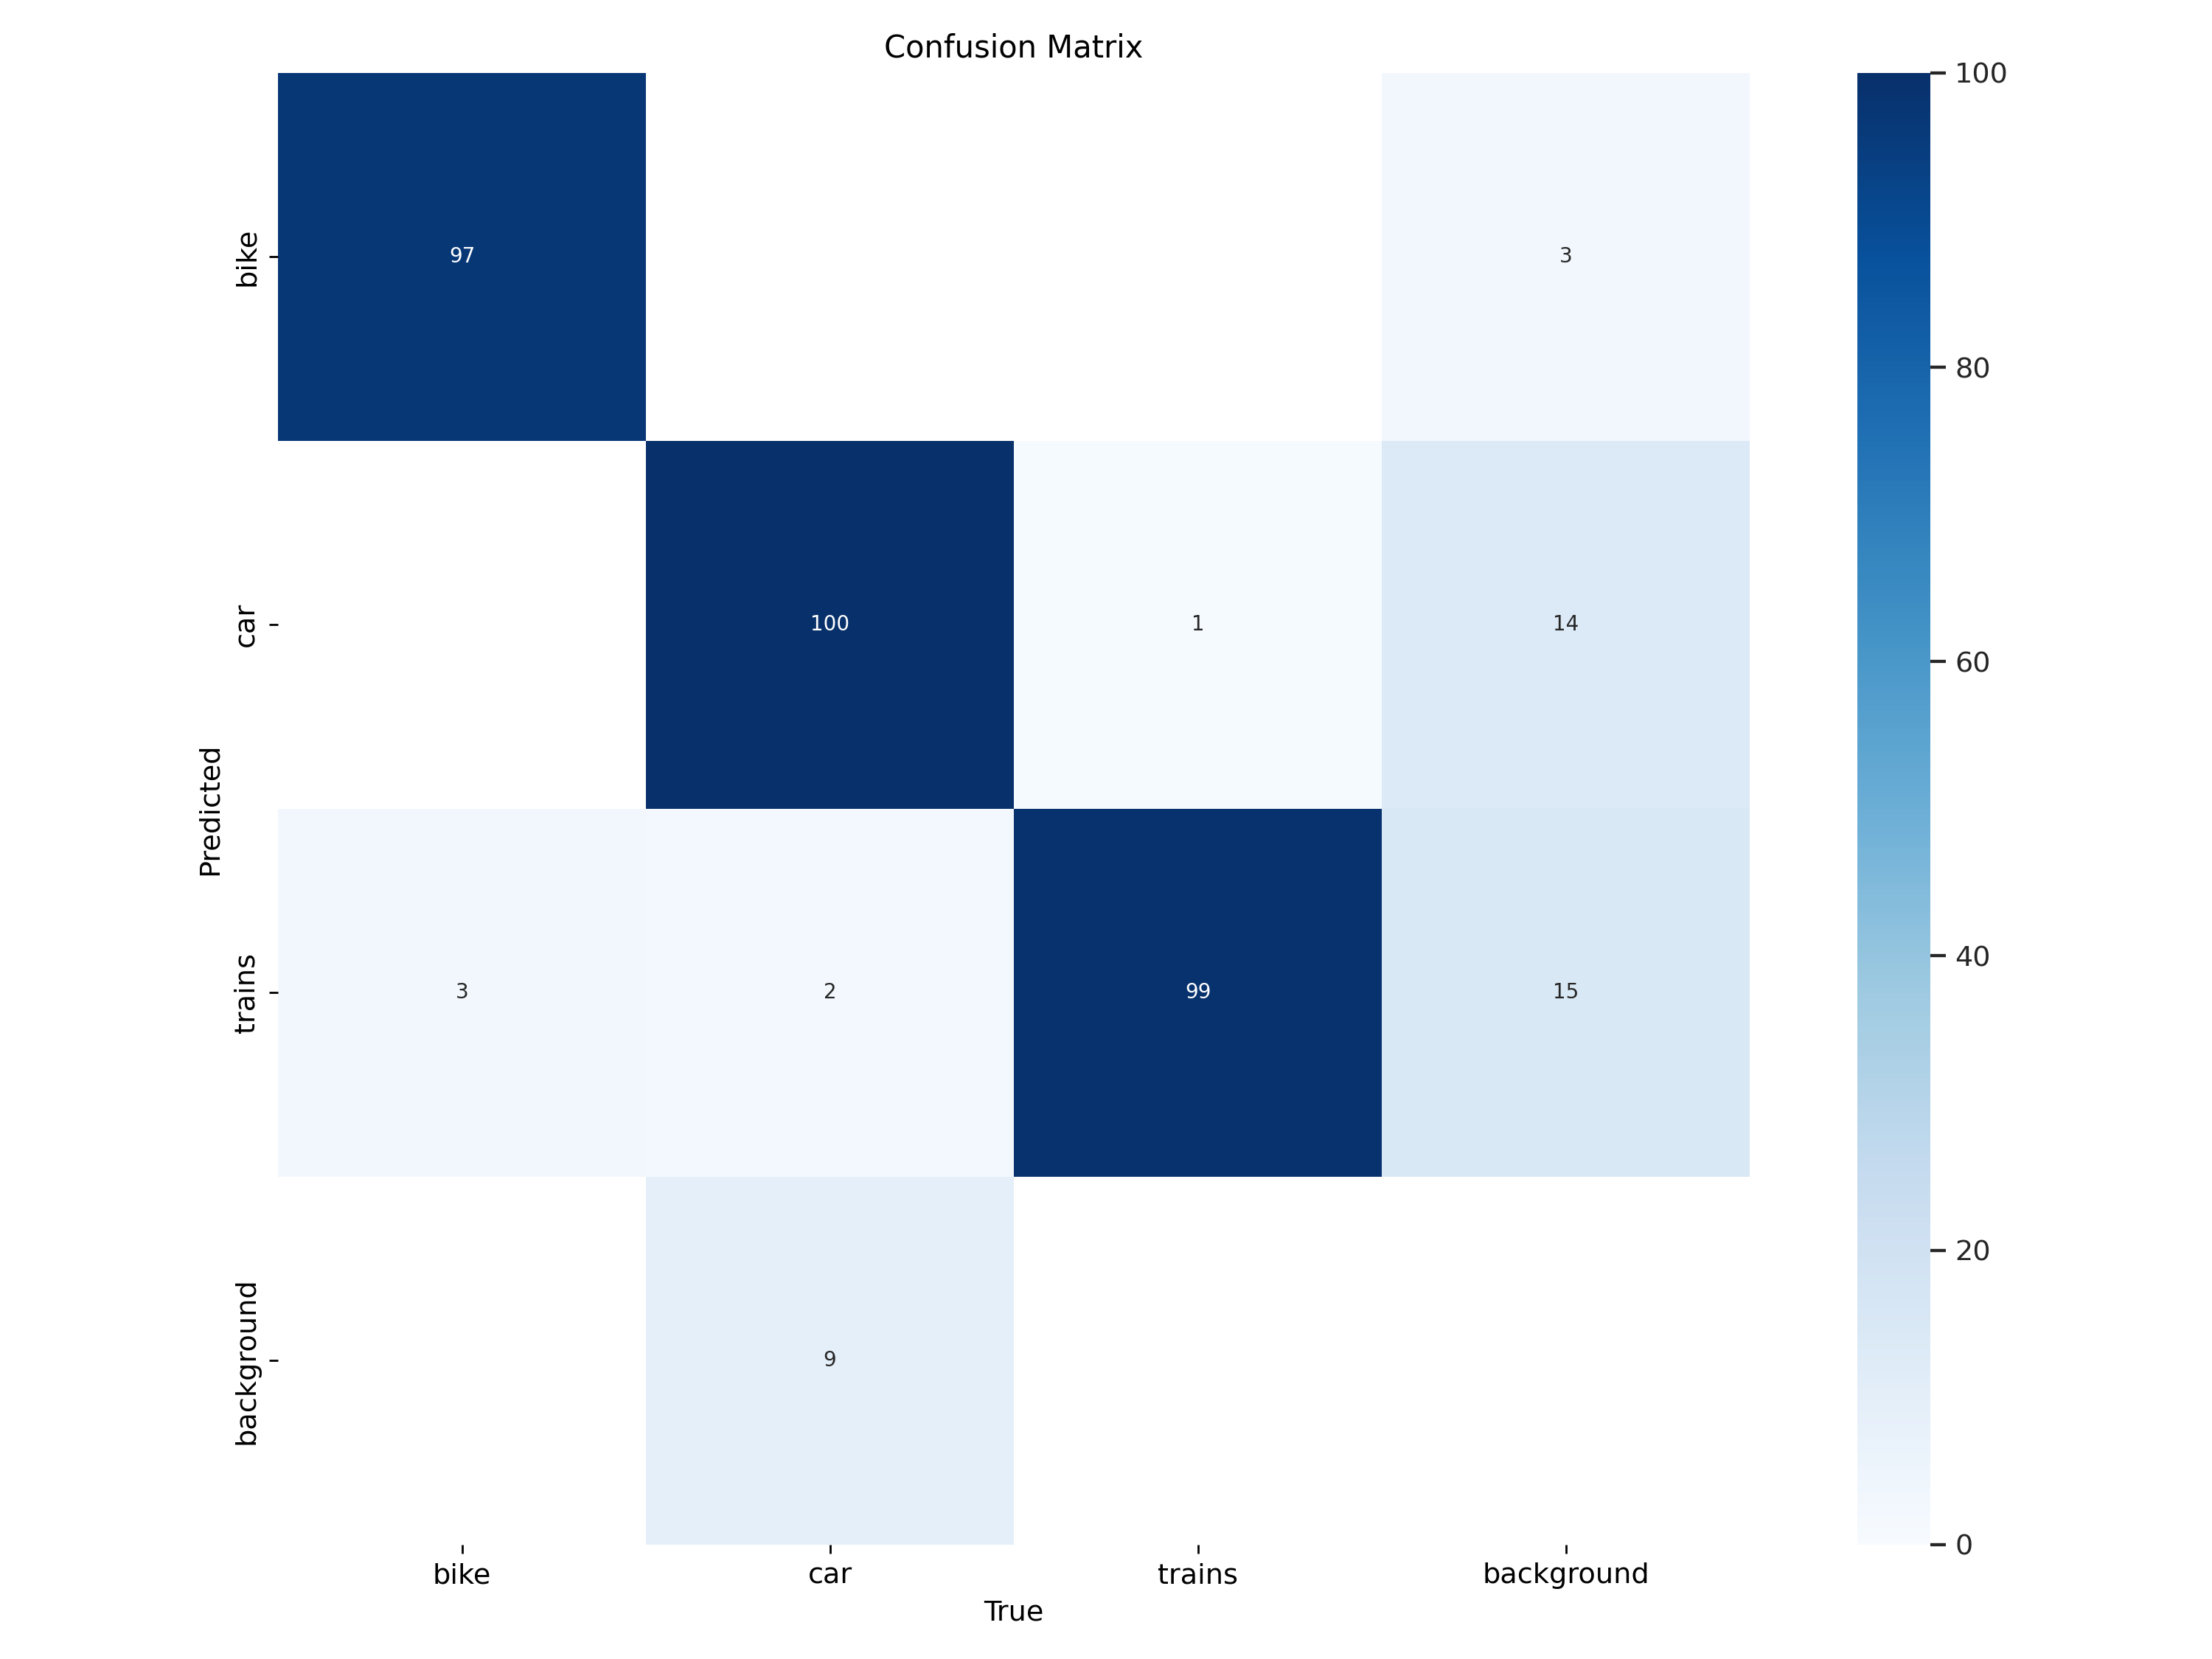

In [10]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/content


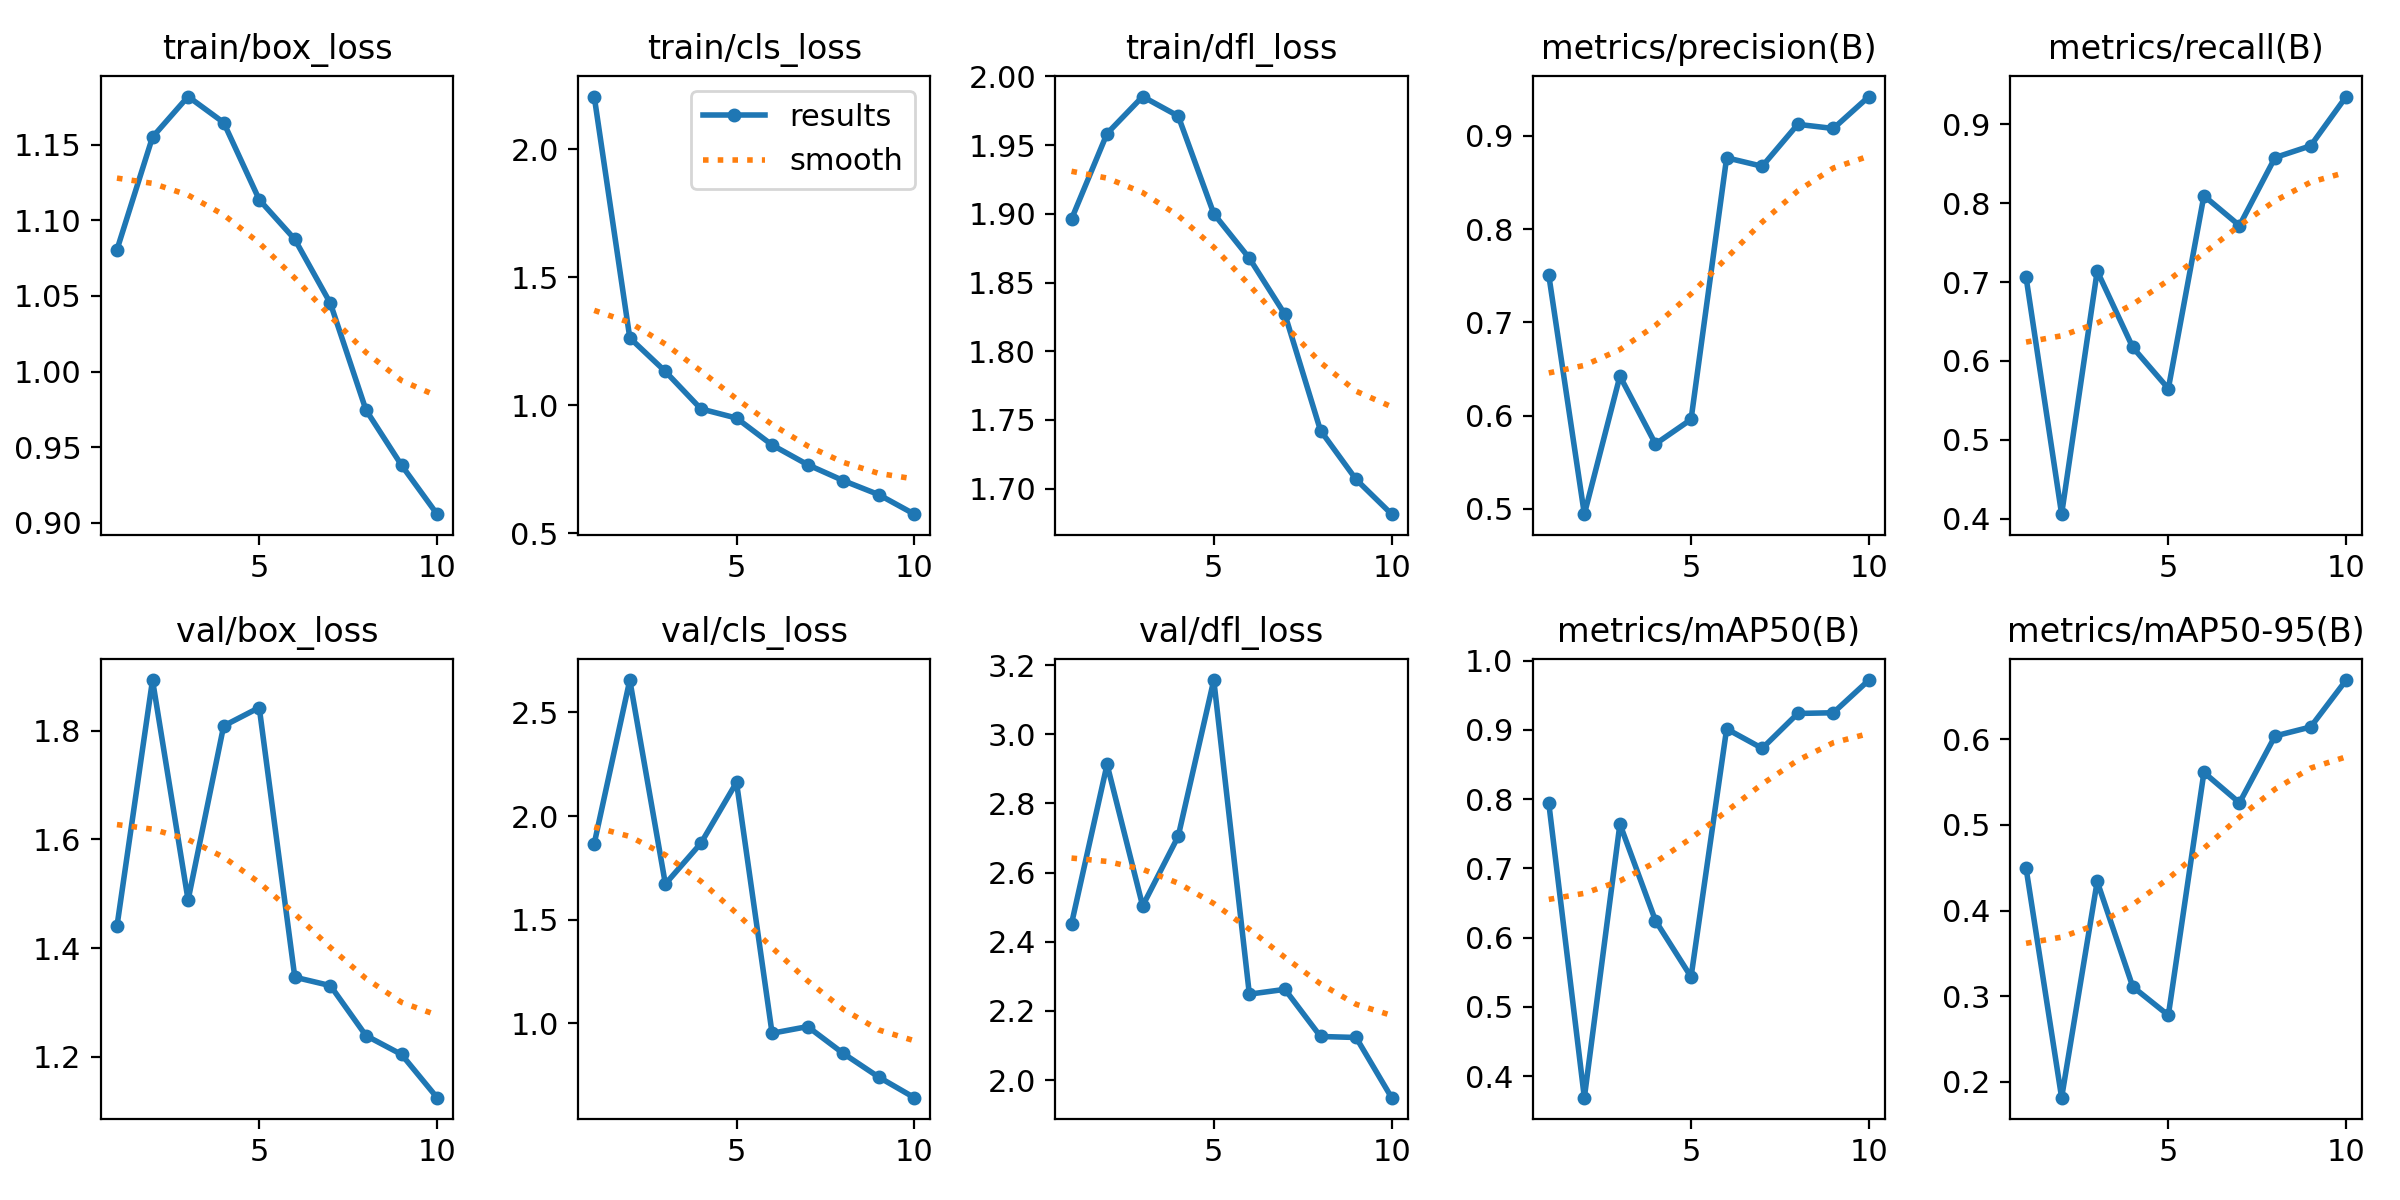

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/content


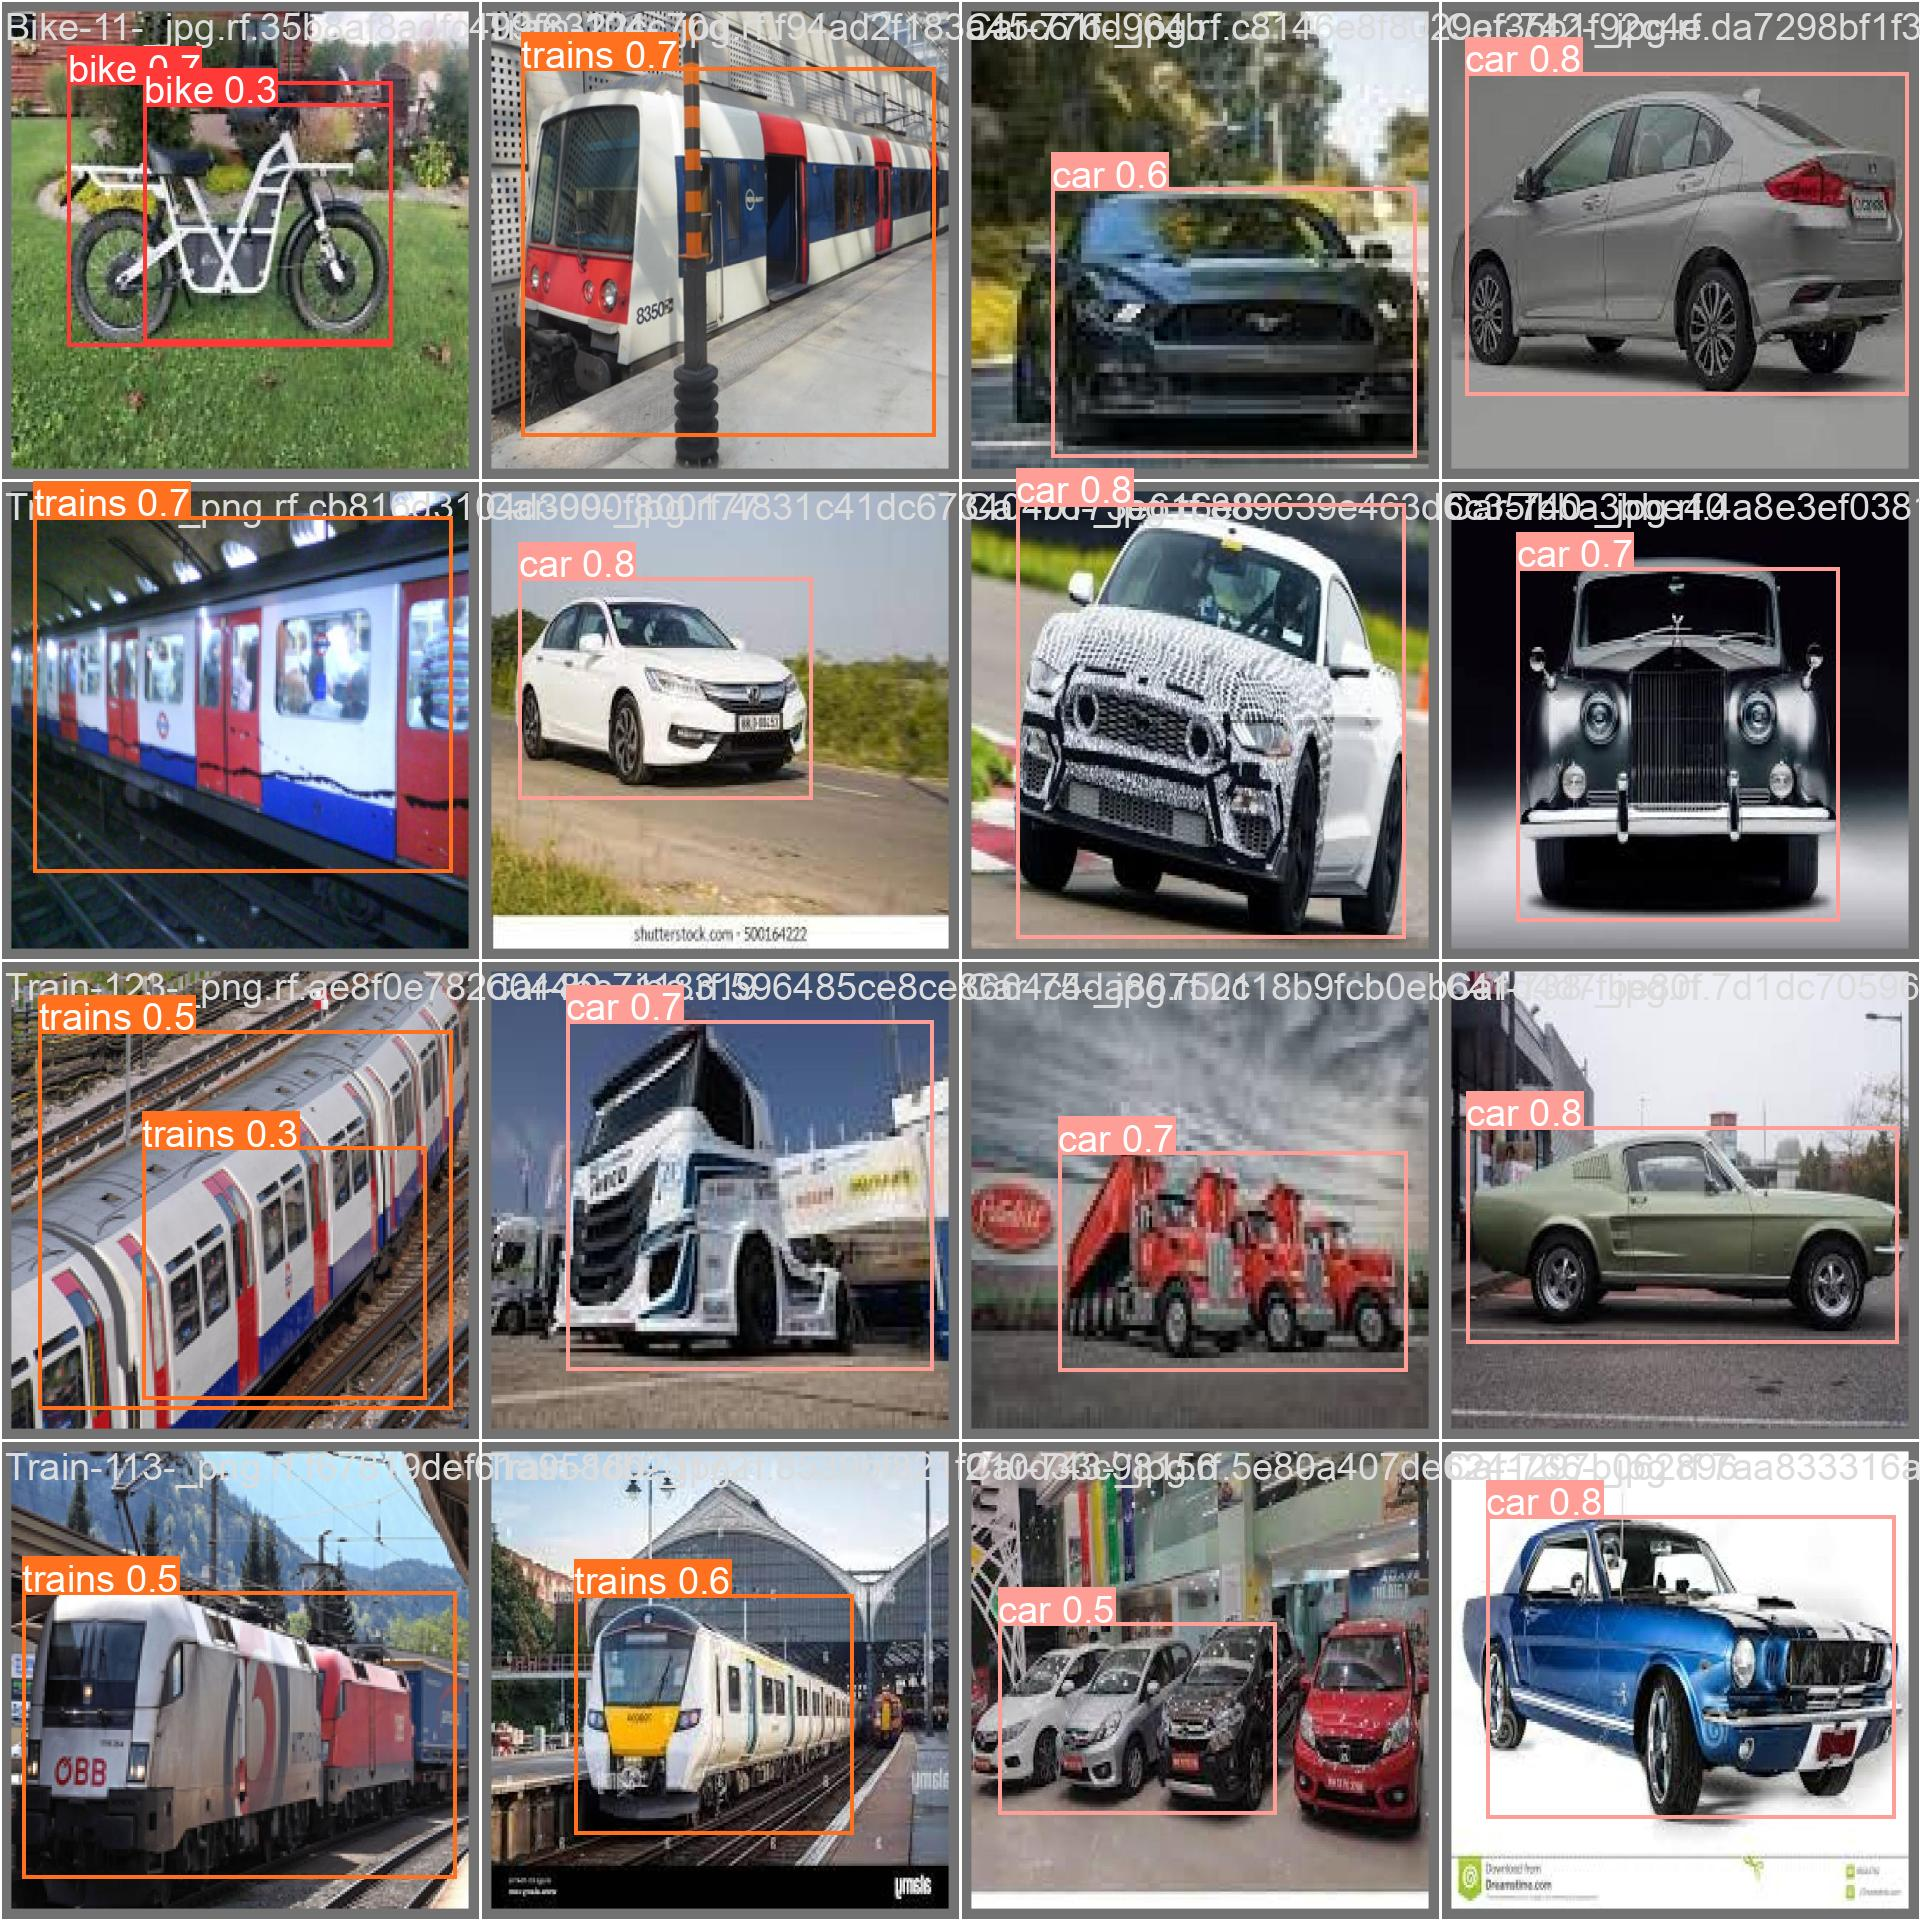

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 193 layers, 9112697 parameters, 0 gradients, 23.8 GFLOPs
val: Scanning /content/datasets/Vehicle-Identification-1/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [03:43<00:00, 11.79s/it]
                   all        300        311      0.939      0.935      0.972      0.669
                  bike        300        100      0.994       0.96      0.993      0.754
                   car        300        111       0.89      0.876      0.943      0.613
                trains        300        100      0.934       0.97      0.978       0.64
Speed: 5.3ms preprocess, 733.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 193 layers, 9112697 parameters, 0 gradients, 23.8 GFLOPs

image 1/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-123-_jpg.rf.998c6d2903f3b49d2f33234a033ad68a.jpg: 640x640 1 bike, 566.2ms
image 2/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-152-_jpg.rf.a22d00c0779bfb53019e9a07d41de75e.jpg: 640x640 1 bike, 560.9ms
image 3/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-159-_jpg.rf.71719df8422404771a00db9969b6090c.jpg: 640x640 1 bike, 533.4ms
image 4/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-162-_jpg.rf.c3ef69bda42c99a21b013933cbab51e5.jpg: 640x640 1 bike, 544.2ms
image 5/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-175-_jpg.rf.409d86f62ef6c6cf63e3089fabfda7d2.jpg: 640x640 1 bike, 529.7ms
image 6/150 /content/datasets/Vehicle-Identification-1/test/images/Bike-180-_jpg.rf.a84e44c9a


image 1/1 /content/Car (797).jpg: 384x640 1 car, 1 trains, 557.5ms
Speed: 3.1ms preprocess, 557.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


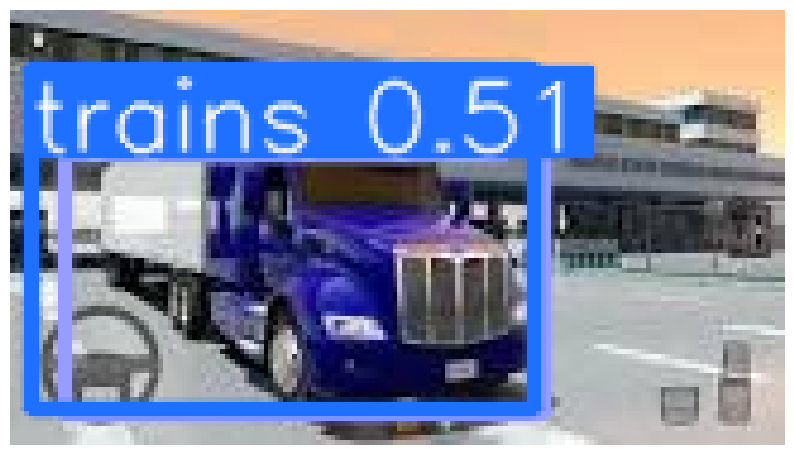

In [19]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Path ke file model yang sudah dilatih
model_path = f'{HOME}/runs/detect/train5/weights/best.pt'

# Path ke gambar yang ingin diuji
image_path = '/content/Car (797).jpg'  # Ganti dengan nama file gambar spesifik

# Memuat model YOLO
model = YOLO(model_path)

# Melakukan prediksi pada satu gambar
results = model(image_path, conf=0.25)

# Menampilkan hasil prediksi
result_img = results[0].plot()  # Plot gambar dengan bounding box

# Menampilkan gambar hasil prediksi menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(result_img)
plt.axis('off')  # Menghilangkan axis
plt.show()

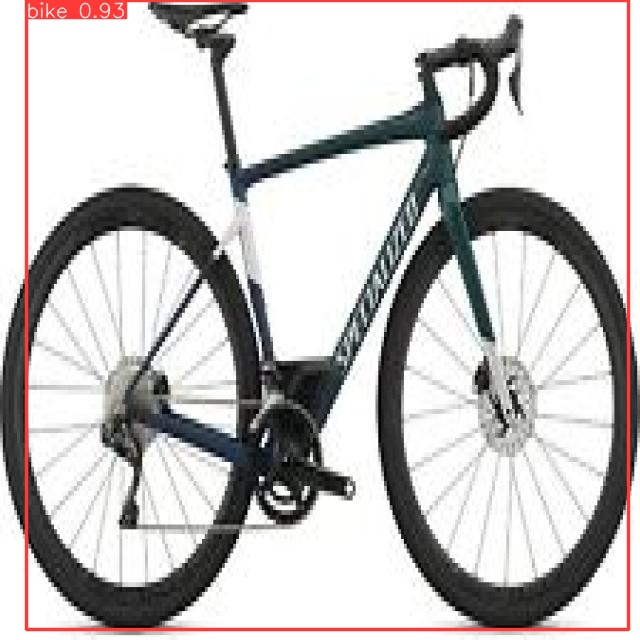

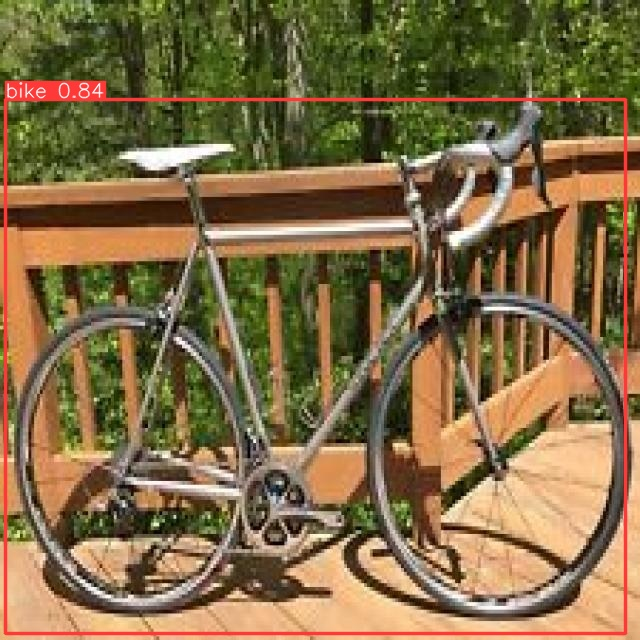

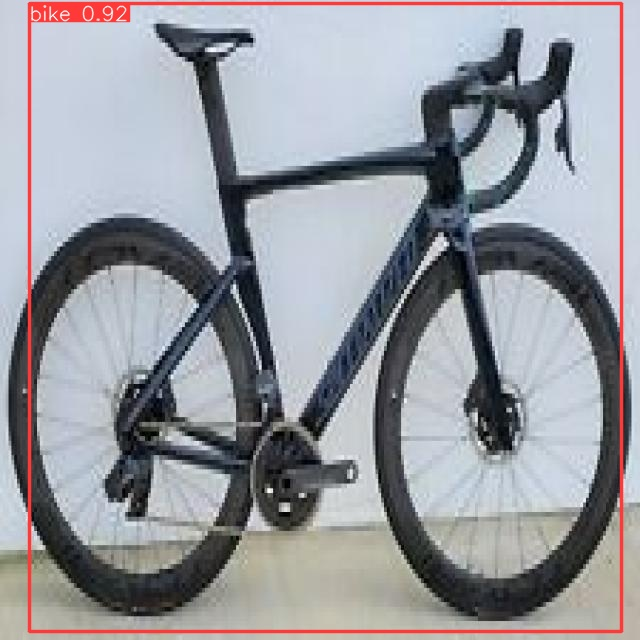

In [20]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")